# General analysis from association rules

## Import all rules results

In [1]:
%run '../scripts/import-all-rules-results.py'

all_rules

,items_base,items_add,support,confidence,lift,year
0,[],['Dependencia administrativa nao informada'],0.713842,0.713842,1.000000,2019
1,[],['Entre 17 e 25 anos'],0.813179,0.813179,1.000000,2019
2,[],['Feminino'],0.537954,0.537954,1.000000,2019
3,[],['Já concluí o Ensino Médio'],0.528198,0.528198,1.000000,2019
4,[],['NOTA: MUITO ACIMA DA MÉDIA'],0.644401,0.644401,1.000000,2019
...,...,...,...,...,...,...
1460629,"['Solteiro(a)', 'Branco', 'Tem computador', 'N...",['Já concluí o Ensino Médio'],0.111337,0.967369,2.056718,2022
1460630,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Feminino'],0.111337,0.594778,1.051158,2022
1460631,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Entre 17 e 25 anos'],0.111337,0.949476,1.122392,2022
1460632,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Dependencia administrativa nao informada'],0.111337,1.000000,1.468439,2022


## Filter by relevant rules (lift > 1.1)

In [2]:
relevant_rules_table_2019 = rules_table_2019.query("lift > 1.1")
relevant_rules_table_2020 = rules_table_2020.query("lift > 1.1")
relevant_rules_table_2021 = rules_table_2021.query("lift > 1.1")
relevant_rules_table_2022 = rules_table_2022.query("lift > 1.1")

print("2019: " + str(relevant_rules_table_2019['items_base'].count()))
print("2020: " + str(relevant_rules_table_2020['items_base'].count()))
print("2021: " + str(relevant_rules_table_2021['items_base'].count()))
print("2022: " + str(relevant_rules_table_2022['items_base'].count()))

2019: 255215
2020: 414244
2021: 354631
2022: 236888


## Recurring rules

In [3]:
intersec_pre_covid = pd.merge(relevant_rules_table_2019, relevant_rules_table_2020, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_x', '_y'))
intersec_pos_covid = pd.merge(relevant_rules_table_2021, relevant_rules_table_2022, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_x', '_y'))

## Save results to a new CSV file

In [4]:
import os
intersec_pre_covid.to_csv('results/covid-analysis/intersection-pre-covid.csv')
intersec_pos_covid.to_csv('results/covid-analysis/intersection-pos-covid.csv')

## View data of interest for pre-covid period

In [5]:
intersec_pre_covid.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y
3,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.420352,0.851260,1.321009,2019,0.493427,0.903301,1.220094,2020
12,['Classe Social C'],['NOTA: MUITO ACIMA DA MÉDIA'],0.219298,0.973313,1.510415,2019,0.226795,0.986603,1.332610,2020
17,['Classe Social D'],['NOTA: MUITO ACIMA DA MÉDIA'],0.146098,0.888072,1.378136,2019,0.189362,0.932297,1.259259,2020
40,['Mãe Graduação completa'],['NOTA: MUITO ACIMA DA MÉDIA'],0.194682,0.933880,1.449222,2019,0.215782,0.948622,1.281308,2020
43,['Mãe Pós-graduação completa'],['NOTA: MUITO ACIMA DA MÉDIA'],0.201946,0.954989,1.481979,2019,0.243557,0.967863,1.307298,2020
...,...,...,...,...,...,...,...,...,...,...
239221,"['Região Sudeste', 'Branco', 'Solteiro(a)', 'T...","['Já concluí o Ensino Médio', 'NOTA: MUITO ACI...",0.110686,0.917392,2.400426,2019,0.144961,0.953484,1.941940,2020
239228,"['Região Sudeste', 'Branco', 'Solteiro(a)', 'T...","['NOTA: MUITO ACIMA DA MÉDIA', 'Entre 17 e 25 ...",0.110686,0.916750,1.620421,2019,0.144961,0.929239,1.393431,2020
239236,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...","['NOTA: MUITO ACIMA DA MÉDIA', 'Dependencia ad...",0.110686,0.978440,2.049847,2019,0.144961,0.990210,1.830210,2020
239244,"['Região Sudeste', 'Solteiro(a)', 'Tem computa...","['Branco', 'NOTA: MUITO ACIMA DA MÉDIA']",0.110686,0.691341,1.644673,2019,0.144961,0.724370,1.468039,2020


In [6]:
intersec_pre_covid.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y
21,['Classe Social E'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.330243,0.716345,2.014476,2019,0.242099,0.582680,2.244132,2020
47,['Não tem computador'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.256183,0.842617,2.369573,2019,0.192442,0.789964,3.042465,2020
418,"['Classe Social E', 'Dependencia administrativ...",['NOTA: MUITO ABAIXO DA MÉDIA'],0.217493,0.679807,1.911724,2019,0.186334,0.563080,2.168645,2020
429,"['Classe Social E', 'Entre 17 e 25 anos']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.230479,0.665412,1.871244,2019,0.161536,0.512227,1.972789,2020
443,"['Feminino', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.189218,0.734292,2.064946,2019,0.138486,0.599882,2.310383,2020
...,...,...,...,...,...,...,...,...,...,...
51048,"['Não tem computador', 'Classe Social E', 'Ent...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Tem celular']",0.157095,0.834048,2.457668,2019,0.114626,0.771310,3.101354,2020
51049,"['Não tem computador', 'Classe Social E', 'Ent...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Solteiro(a)']",0.157095,0.840052,2.756284,2019,0.114626,0.774735,3.527335,2020
51051,"['Não tem computador', 'Classe Social E', 'Tem...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Entre 17 e 25...",0.157095,0.696387,2.814475,2019,0.114626,0.632538,3.654292,2020
51055,"['Não tem computador', 'Entre 17 e 25 anos', '...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Classe Social...",0.157095,0.775716,2.348921,2019,0.114626,0.707359,2.921783,2020


## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [7]:
all_high = intersec_pre_covid.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

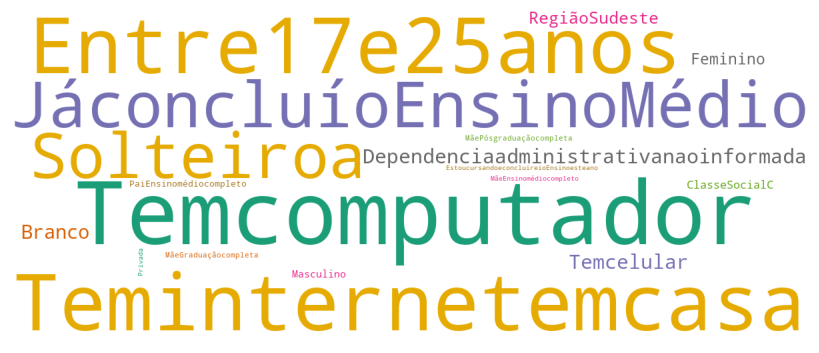

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

In [9]:
all_low = intersec_pre_covid.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

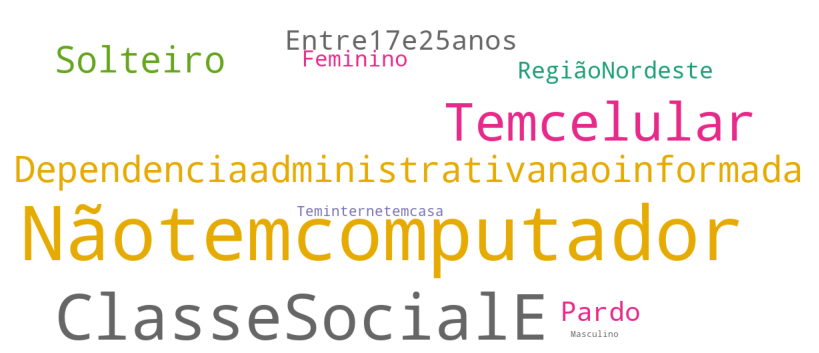

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## View data of interest for pos-covid period

In [11]:
intersec_pos_covid.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y
3,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.453407,0.838403,1.298055,2021,0.348986,0.739545,1.518887,2022
11,['Classe Social C'],['NOTA: MUITO ACIMA DA MÉDIA'],0.215612,0.958359,1.483775,2021,0.158446,0.944125,1.939057,2022
14,['Classe Social D'],['NOTA: MUITO ACIMA DA MÉDIA'],0.154721,0.842261,1.304028,2021,0.117142,0.784482,1.611180,2022
46,['Já concluí o Ensino Médio'],['NOTA: MUITO ACIMA DA MÉDIA'],0.427115,0.799196,1.237352,2021,0.321955,0.684507,1.405849,2022
54,['Mãe Graduação completa'],['NOTA: MUITO ACIMA DA MÉDIA'],0.191225,0.902302,1.396986,2021,0.146007,0.839762,1.724713,2022
...,...,...,...,...,...,...,...,...,...,...
172802,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...","['Feminino', 'NOTA: MUITO ACIMA DA MÉDIA']",0.146359,0.587135,1.685305,2021,0.111337,0.569036,2.224006,2022
172809,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...","['NOTA: MUITO ACIMA DA MÉDIA', 'Entre 17 e 25 ...",0.146359,0.920278,1.590580,2021,0.111337,0.907219,2.065577,2022
172817,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...","['NOTA: MUITO ACIMA DA MÉDIA', 'Dependencia ad...",0.146359,0.977646,2.074198,2021,0.111337,0.962302,2.701502,2022
172826,"['Solteiro(a)', 'Tem computador', 'Já concluí ...","['Branco', 'NOTA: MUITO ACIMA DA MÉDIA']",0.146359,0.682974,1.506317,2021,0.111337,0.673727,1.930530,2022


In [12]:
intersec_pos_covid.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y
20,['Classe Social E'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.313478,0.710366,2.006073,2021,0.469317,0.821316,1.600692,2022
38,['Estadual'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.112241,0.896097,2.530577,2021,0.178954,0.960210,1.871388,2022
59,['Não tem computador'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.241015,0.882451,2.492039,2021,0.373082,0.929626,1.811780,2022
61,['Pardo'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.195288,0.583566,1.647989,2021,0.289127,0.740045,1.442300,2022
62,['Pública'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.174274,0.773031,2.183037,2021,0.265086,0.890666,1.735850,2022
...,...,...,...,...,...,...,...,...,...,...
127092,['Estou cursando e concluirei o Ensino este an...,"['Pública', 'NOTA: MUITO ABAIXO DA MÉDIA']",0.104487,0.814608,4.674288,2021,0.174385,0.900630,3.397498,2022
127097,"['Solteiro(a)', 'Entre 17 e 25 anos', 'Classe ...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Estou cursand...",0.104487,0.883174,4.947738,2021,0.174385,0.952153,3.509623,2022
127101,['Estou cursando e concluirei o Ensino este an...,"['NOTA: MUITO ABAIXO DA MÉDIA', 'Entre 17 e 25...",0.104487,0.860997,3.267125,2021,0.174385,0.931907,2.291210,2022
127107,['Estou cursando e concluirei o Ensino este an...,"['NOTA: MUITO ABAIXO DA MÉDIA', 'Classe Social...",0.104487,0.626277,1.997837,2021,0.174385,0.789559,1.682357,2022


## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [13]:
all_high = intersec_pos_covid.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

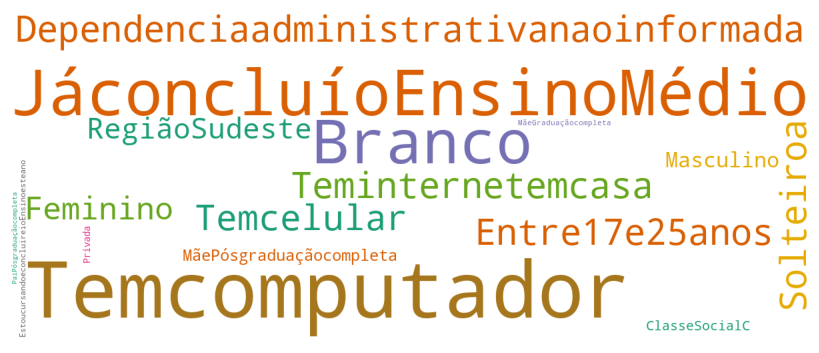

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

In [15]:
all_low = intersec_pos_covid.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

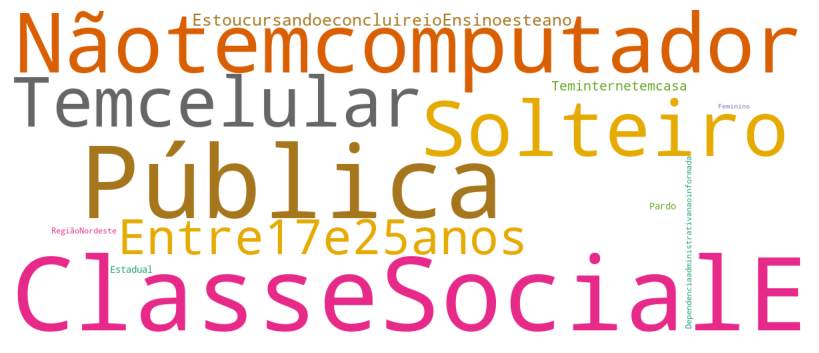

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()